In [43]:
library(tidyverse)
library(stargazer)
library(olsrr)
library(readr)
library(readxl)
library(dplyr)
library(broom)
library(car)
library(lmtest)
library(corpcor)
library(sandwich)
library(fastDummies)
library(plm)
library(forecast)

options(scipen=999)

In [28]:
vmt.ann = read_excel('data/WorkingData.xlsx', sheet = 'IN-VMT-clean')[1:30,]
colnames(vmt.ann) = c('year','vmt')

New names:
* `` -> `...1`


In [46]:
gas = read_excel('data/WorkingData.xlsx', sheet = 'GasRevMonthly')
gas = dummy_cols(gas, select_columns = c('month','year'))
gas$mnth = match(gas$month, month.name)
gas$year = factor(gas$year)
gas$mnth = factor(gas$mnth)
gas$time = index(gas$year) 

# 2022 VMT Forecast

In [27]:
vmt.2022.m = lm(vmt ~ year, vmt.ann)
vmt.2022.m$coefficients[[1]] + vmt.2022.m$coefficients[[2]]*2022

[1] 84391.21

# Gas Forecast

In [91]:
gas.m = lm(gas.rev.ann ~ time + mnth + year, gas)
data.frame(gas.m$coefficients)

,gas.m.coefficients
,<dbl>
(Intercept),444489009.5
time,1938964.5
mnth2,-1938964.5
mnth3,-3877928.9
mnth4,-5816893.4
mnth5,-7755857.9
mnth6,-9694822.3
mnth7,-11633786.8
mnth8,-13572751.2


In [126]:
gas.fc = data.frame(matrix(ncol=1,nrow=11*12))
colnames(gas.fc) = c('year')
gas.fc$year = c(2023:2033)
gas.fc$year = gas.fc[order(gas.fc$year),]
gas.fc$mnth = c(1:12)
gas.fc$time = c(1:(11*12))
gas.fc = dummy_cols(gas.fc, select_columns = 'mnth')


In [133]:
gas.fc$gas.hat = (gas.m$coefficients[[1]] + gas.fc$time*gas.m$coefficients[[2]] + gas.fc$mnth_2*gas.m$coefficients[[3]] + gas.fc$mnth_3*gas.m$coefficients[[4]] + gas.fc$mnth_4*gas.m$coefficients[[5]] + gas.fc$mnth_5*gas.m$coefficients[[6]] + gas.fc$mnth_6*gas.m$coefficients[[7]] + gas.fc$mnth_7*gas.m$coefficients[[8]] + gas.fc$mnth_8*gas.m$coefficients[[9]] + gas.fc$mnth_9*gas.m$coefficients[[10]] + gas.fc$mnth_10*gas.m$coefficients[[11]] + gas.fc$mnth_11*gas.m$coefficients[[12]] + gas.fc$mnth_12*gas.m$coefficients[[13]])

gas.fc

year,mnth,time,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,gas.hat
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2023,1,1,1,0,0,0,0,0,0,0,0,0,0,0,446427974
2023,2,2,0,1,0,0,0,0,0,0,0,0,0,0,446427974
2023,3,3,0,0,1,0,0,0,0,0,0,0,0,0,446427974
2023,4,4,0,0,0,1,0,0,0,0,0,0,0,0,446427974
2023,5,5,0,0,0,0,1,0,0,0,0,0,0,0,446427974
2023,6,6,0,0,0,0,0,1,0,0,0,0,0,0,446427974
2023,7,7,0,0,0,0,0,0,1,0,0,0,0,0,446427974
2023,8,8,0,0,0,0,0,0,0,1,0,0,0,0,446427974
2023,9,9,0,0,0,0,0,0,0,0,1,0,0,0,446427974


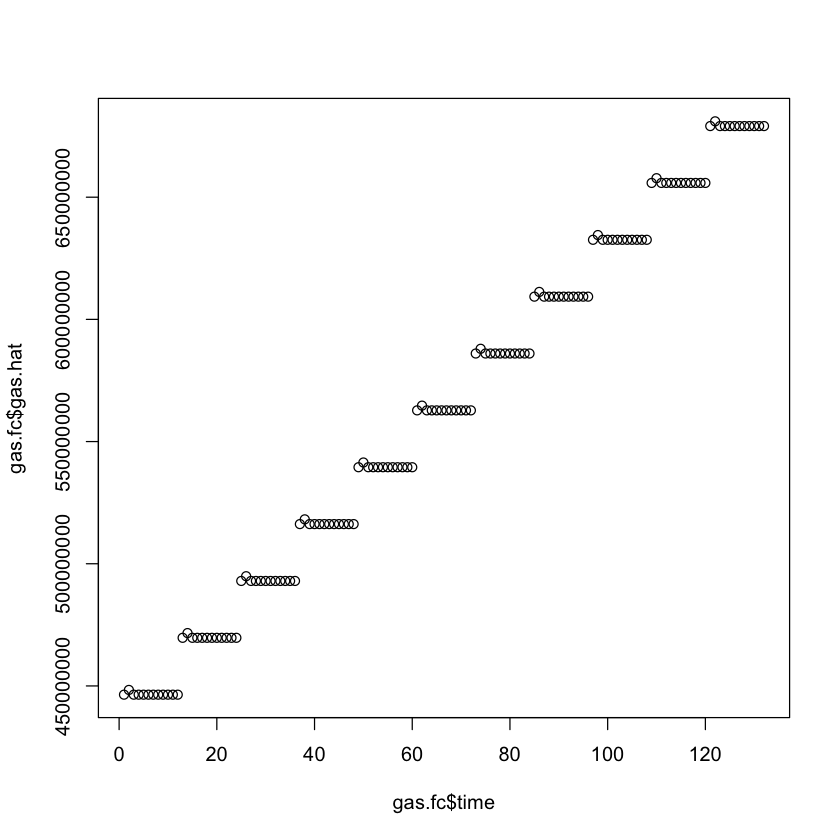

In [124]:
plot(gas.fc$time,gas.fc$gas.hat)

[1] -3877929